# Redes Neurais Artificiais – Atividade Avaliativa 1.2

## Análise Exploratória e Visualização de Atributos

### 2 Detalhamento da Atividade

A base de dados a ser utilizada encontra-se disponível em <https://covid19.manaus.am.gov.br/wp-content/uploads/Manaus.csv>.

In [1]:
import os
from os.path import exists, join, expanduser

os.chdir(expanduser("~"))

data_dir = "data"
if not exists(data_dir):
  ! mkdir data && cd data && wget https://covid19.manaus.am.gov.br/wp-content/uploads/Manaus.csv

--2021-10-18 14:04:44--  https://covid19.manaus.am.gov.br/wp-content/uploads/Manaus.csv
Resolving covid19.manaus.am.gov.br (covid19.manaus.am.gov.br)... 200.213.236.3
Connecting to covid19.manaus.am.gov.br (covid19.manaus.am.gov.br)|200.213.236.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41685138 (40M) [text/csv]
Saving to: ‘Manaus.csv’

Manaus.csv          100%[===================>]  39.75M  5.18MB/s    in 8.7s    

2021-10-18 14:04:54 (4.55 MB/s) - ‘Manaus.csv’ saved [41685138/41685138]



In [2]:
! ls ~/data

Manaus.csv


* Importar principais bibliotecas

In [3]:
! pip freeze | grep -E -i '^((matplotlib.*)|(numpy.*)|(pandas.*)|(seaborn.*))'

matplotlib==3.2.2
matplotlib-inline==0.1.3
matplotlib-venn==0.11.6
numpy==1.19.5
pandas==1.1.5
pandas-datareader==0.9.0
pandas-gbq==0.13.3
pandas-profiling==1.4.1
seaborn==0.11.2


In [4]:
import numpy as np
import pandas as pd

In [5]:
data_path = [data_dir]
filepath = os.sep.join(data_path + ['Manaus.csv'])
print(filepath)

data/Manaus.csv


In [6]:
data_all = pd.read_csv(filepath, sep = ';', encoding = 'utf-8')
len(data_all)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,6,7,8,9,10,11,12,13,14,15,16,17,18,22,23,26,27,28,29,30,31) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


243984

In [7]:
data = data_all
data.head(10)

,_dt_evolucao,_dt_notificacao,_dt_sintomas,_classificacao,_conclusao,_origem,_comorb_cardio,_comorb_cromossomica,_comorb_diabetes,_comorb_hemato,_comorb_hepatica,_comorb_imuno,_comorb_neurologica,_comorb_obessidade,_comorb_renal,_comorb_respiratoria,_criterio,_etnia,_evolução,_idade,_faixa etária,_gestante,_profiss_saude,_raca,_se_notificacao,_sexo,_sintoma_dispneia,_sintoma_febre,_sintoma_garganta,_sintoma_tosse,_sintoma_outros,_srag,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_distrito,_taxa
0,25/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,4.0,1a - 4a,NaN,NaN,Parda,1.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,TARUMA,TARUMÃ,OESTE,"0,243042897"
1,03/01/2020 00:00,03/01/2020 00:00,01/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,26.0,20a - 29a,NaN,NaN,Parda,1.0,F,Sim,Sim,Sim,Sim,Sim,Influenza B,NaN,NaN,NaN,TARUMA-ACU,TARUMÃ-AÇÚ,OESTE,"0,684931507"
2,05/01/2020 00:00,03/01/2020 00:00,03/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,27.0,20a - 29a,NaN,NaN,Parda,1.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,JORGE TEIXEIRA,JORGE TEIXEIRA,LESTE,"0,073137374"
3,16/01/2020 00:00,08/01/2020 00:00,04/01/2020 00:00,Descartado,Óbito,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,94.0,80a ou +,NaN,NaN,Parda,2.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,FLORES,FLORES,SUL,"0,198306463"
4,11/01/2020 00:00,08/01/2020 00:00,05/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,0.0,< 1a,NaN,NaN,Parda,2.0,M,Sim,Sim,NaN,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,CIDADE DE DEUS,CIDADE DE DEUS,NORTE,"0,117699678"
5,06/02/2020 00:00,09/01/2020 00:00,04/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,0.0,< 1a,NaN,NaN,Parda,2.0,M,Sim,Sim,Sim,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,COLONIA TERRA NOVA,COLÔNIA TERRA NOVA,NORTE,"0,183150183"
6,09/01/2020 00:00,07/01/2020 00:00,05/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clínico,NaN,Internado,8.0,5a - 9a,NaN,NaN,Branca,2.0,M,Sim,Sim,NaN,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,CIDADE DE DEUS,CIDADE DE DEUS,NORTE,"0,117699678"
7,09/01/2020 00:00,07/01/2020 00:00,05/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Clínico,NaN,Internado,2.0,1a - 4a,NaN,NaN,Branca,2.0,F,Sim,Sim,NaN,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,ALEIXO,ALEIXO,SUL,"0,444325958"
8,09/01/2020 00:00,06/01/2020 00:00,06/01/2020 00:00,Descartado,Recuperado,"SIVEP,",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado em UTI,28.0,20a - 29a,NaN,NaN,Branca,2.0,F,Sim,Sim,NaN,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,CIDADE DE DEUS,CIDADE DE DEUS,NORTE,"0,117699678"
9,10/01/2020 00:00,09/01/2020 00:00,09/01/2020 00:00,Descartado,Óbito,"SIVEP,",Sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Laboratorial,NaN,Internado,80.0,80a ou +,NaN,NaN,Parda,2.0,M,Sim,Sim,NaN,Sim,Sim,SRAG não especificado,NaN,NaN,NaN,PETROPOLIS,PETRÓPOLIS,SUL,"0,232948192"


# 2.1 Visão Geral dos Casos Confirmados

Considerar apenas os casos confirmados:

* Encontrar informação na coluna **_classificacao**:

In [8]:
confirmados = data.loc[data['_classificacao'] == "Confirmado"]
data = confirmados

###### 1. Quantos atributos descrevem cada exemplo? Quais são eles?

In [9]:
# numero de colunas
# len(data.columns)
data.shape[1]

39

In [10]:
data.columns.tolist()

['_dt_evolucao',
 '_dt_notificacao',
 '_dt_sintomas',
 '_classificacao',
 '_conclusao',
 '_origem',
 '_comorb_cardio',
 '_comorb_cromossomica',
 '_comorb_diabetes',
 '_comorb_hemato',
 '_comorb_hepatica',
 '_comorb_imuno',
 '_comorb_neurologica',
 '_comorb_obessidade',
 '_comorb_renal',
 '_comorb_respiratoria',
 '_criterio',
 '_etnia',
 '_evolução',
 '_idade',
 '_faixa etária',
 '_gestante',
 '_profiss_saude',
 '_raca',
 '_se_notificacao',
 '_sexo',
 '_sintoma_dispneia',
 '_sintoma_febre',
 '_sintoma_garganta',
 '_sintoma_tosse',
 '_sintoma_outros',
 '_srag',
 '_teste_anticorpo',
 '_teste_antigeno',
 '_teste_pcr',
 '_bairro',
 '_bairro_mapa',
 '_distrito',
 '_taxa']

###### 2. Quantos casos confirmados há em Manaus, cumulativamente?

In [11]:
# numero de linhas
# len(data)
data.shape[0]

80420

###### 3. A qual período de tempo a base de dados se refere, isto é, qual o registro mais antigo e qual o mais recente? Leve em conta a data de notificação.

In [12]:
periodo = pd.to_datetime(data['_dt_notificacao'], format='%d/%m/%Y %H:%M').agg(['min', 'max'])
periodo

min   2020-02-16
max   2020-12-29
Name: _dt_notificacao, dtype: datetime64[ns]

In [13]:
print(f'Inínio: {periodo.iloc[0]}; Fim: {periodo.iloc[1]}')

Inínio: 2020-02-16 00:00:00; Fim: 2020-12-29 00:00:00


Excluir todos os atributos relativos às comorbidades, sintomas, etnia, profissão, outras datas que não a de notificação, origem e outros
que não estiverem envolvidos no contexto do trabalho solicitado.

In [14]:
data.columns

Index(['_dt_evolucao', '_dt_notificacao', '_dt_sintomas', '_classificacao',
       '_conclusao', '_origem', '_comorb_cardio', '_comorb_cromossomica',
       '_comorb_diabetes', '_comorb_hemato', '_comorb_hepatica',
       '_comorb_imuno', '_comorb_neurologica', '_comorb_obessidade',
       '_comorb_renal', '_comorb_respiratoria', '_criterio', '_etnia',
       '_evolução', '_idade', '_faixa etária', '_gestante', '_profiss_saude',
       '_raca', '_se_notificacao', '_sexo', '_sintoma_dispneia',
       '_sintoma_febre', '_sintoma_garganta', '_sintoma_tosse',
       '_sintoma_outros', '_srag', '_teste_anticorpo', '_teste_antigeno',
       '_teste_pcr', '_bairro', '_bairro_mapa', '_distrito', '_taxa'],
      dtype='object')

In [15]:
data = data.drop(['_dt_evolucao', '_dt_sintomas', '_origem', \
           '_comorb_cardio', '_comorb_cromossomica', '_comorb_diabetes', \
           '_comorb_hemato', '_comorb_hepatica', '_comorb_imuno', \
           '_comorb_neurologica', '_comorb_obessidade', '_comorb_renal', \
           '_comorb_respiratoria', '_criterio', '_etnia', '_evolução', '_faixa etária', \
           '_gestante', '_profiss_saude', '_raca', '_se_notificacao', '_sintoma_dispneia', \
           '_sintoma_febre', '_sintoma_garganta', '_sintoma_tosse', \
           '_sintoma_outros', '_srag', '_distrito'], \
          axis = 1)

Exclua todas as linhas em que houver dados faltantes para os
atributos remanescentes.

In [16]:
data.dropna(subset=['_dt_notificacao', '_classificacao', '_conclusao', \
                        '_idade', '_sexo', '_bairro', '_bairro_mapa'], inplace=True)

In [17]:
data.shape

(41675, 11)

Considerou-se conservar as colunas relacionadas aos testes (para contagem posterior)~~  nos casos onde pelo menos um dos testes tem seu valor inserido~~, evolução e taxa (para avaliação de inferência no item 2.3)

In [18]:
#data = data[(data['_teste_anticorpo'].notna()) | (data['_teste_antigeno'].notna()) | (data['_teste_pcr'].notna())]

In [19]:
data.head()

,_dt_notificacao,_classificacao,_conclusao,_idade,_sexo,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_taxa
130,23/02/2020 00:00,Confirmado,Recuperado,12.0,F,NaN,NaN,1.0,MAUAZINHO,MAUAZINHO,"0,35040998"
144,28/02/2020 00:00,Confirmado,Recuperado,39.0,F,NaN,NaN,1.0,NOVO ALEIXO,NOVO ALEIXO,"0,085452557"
153,02/03/2020 00:00,Confirmado,Recuperado,2.0,F,1.0,NaN,NaN,PRACA 14 DE JANEIRO,PRAÇA 14 DE JANEIRO,"0,861920359"
158,02/03/2020 00:00,Confirmado,Recuperado,71.0,F,2.0,NaN,NaN,FLORES,FLORES,"0,198306463"
196,11/03/2020 00:00,Confirmado,Recuperado,46.0,F,NaN,NaN,2.0,CIDADE NOVA,CIDADE NOVA,"0,068152389"


In [20]:
data.shape

(41675, 11)

###### 2. Qual a porcentagem de indivíduos recuperados em relação ao todo?

In [21]:
recuperados = data.loc[data['_conclusao'] == "Recuperado"]
print(f"{len(recuperados)/len(data)*100} %")

91.89202159568086 %


###### 3. Os casos acometeram mais indivíduos do sexo masculino ou feminino?

In [22]:
data['_sexo'].value_counts(ascending=False)
#data.groupby('_sexo').size()

F    22357
M    19318
Name: _sexo, dtype: int64

Após comparação entre as ocorrências constatou-se que o sexo feminino foi a mais afetado.

###### 4. Qual a média e desvio padrão de idade dos indivíduos que contraíram COVID-19? Qual o indivíduo mais jovem e o mais idoso a contraírem tal enfermidade?

In [23]:
# data['_idade'].mean()
# data['_idade'].std()
estatisticas = data['_idade'].agg(['mean', 'std'])
estatisticas

mean    43.476521
std     17.376359
Name: _idade, dtype: float64

In [24]:
print(f'Média: {estatisticas.iloc[0]}; Desvio padrão: {estatisticas.iloc[1]}')

Média: 43.47652069586083; Desvio padrão: 17.376358811650032


O indivíduo mais idoso:

In [25]:
data.loc[data['_idade'].idxmax()]

_dt_notificacao     27/09/2020 00:00
_classificacao            Confirmado
_conclusao                Recuperado
_idade                           120
_sexo                              F
_teste_anticorpo                   1
_teste_antigeno                  NaN
_teste_pcr                       NaN
_bairro                       CENTRO
_bairro_mapa                  CENTRO
_taxa                    0,284843479
Name: 190278, dtype: object

O indivíduo mais jovem:

In [26]:
data.loc[data['_idade'].idxmin()]

_dt_notificacao     23/03/2020 00:00
_classificacao            Confirmado
_conclusao                     Óbito
_idade                             0
_sexo                              F
_teste_anticorpo                 NaN
_teste_antigeno                  NaN
_teste_pcr                         1
_bairro                LIRIO DO VALE
_bairro_mapa           LÍRIO DO VALE
_taxa                    0,383376783
Name: 247, dtype: object

######  5. Qual o bairro com maior incidência de casos?

Heurística na avaliação dos bairros.

Retirada de acentuação e outras variações substituídas por caracteres alfanuméricos.

In [27]:
from unicodedata import normalize

data['_bairro_mapa'] = data['_bairro_mapa'].apply(lambda x: normalize('NFKD', x).encode('ASCII','ignore').decode('ASCII').lower())

In [28]:
from unicodedata import normalize

data['_bairro'] = data['_bairro'].apply(lambda x: normalize('NFKD', x).encode('ASCII','ignore').decode('ASCII').lower())

Análise para escolha entre as colunas *_bairro* e *_bairro_mapa*.

Verificação da similaridade nos 5 primeiros caracteres.

In [29]:
condicao_5_ini_char = data['_bairro'].str.slice(0,5) == data['_bairro_mapa'].str.slice(0,5)
data.loc[condicao_5_ini_char].head(10)

,_dt_notificacao,_classificacao,_conclusao,_idade,_sexo,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_taxa
130,23/02/2020 00:00,Confirmado,Recuperado,12.0,F,NaN,NaN,1.0,mauazinho,mauazinho,"0,35040998"
144,28/02/2020 00:00,Confirmado,Recuperado,39.0,F,NaN,NaN,1.0,novo aleixo,novo aleixo,"0,085452557"
153,02/03/2020 00:00,Confirmado,Recuperado,2.0,F,1.0,NaN,NaN,praca 14 de janeiro,praca 14 de janeiro,"0,861920359"
158,02/03/2020 00:00,Confirmado,Recuperado,71.0,F,2.0,NaN,NaN,flores,flores,"0,198306463"
196,11/03/2020 00:00,Confirmado,Recuperado,46.0,F,NaN,NaN,2.0,cidade nova,cidade nova,"0,068152389"
247,23/03/2020 00:00,Confirmado,Óbito,0.0,F,NaN,NaN,1.0,lirio do vale,lirio do vale,"0,383376783"
263,25/03/2020 00:00,Confirmado,Óbito,55.0,M,NaN,NaN,1.0,colonia terra nova,colonia terra nova,"0,183150183"
270,20/03/2020 00:00,Confirmado,Óbito,43.0,M,NaN,NaN,1.0,cidade nova,cidade nova,"0,068152389"
271,22/03/2020 00:00,Confirmado,Recuperado,39.0,F,NaN,NaN,1.0,nossa senhora das gracas,nossa senhora das gracas,"0,58411215"
273,24/03/2020 00:00,Confirmado,Recuperado,88.0,M,NaN,NaN,1.0,dom pedro i,dom pedro,"0,483629153"


Divergência nos nomes completos dado critério de similaridade (início coincidente, mas não o todo).

In [30]:
bairros_analise = data.loc[condicao_5_ini_char & (data['_bairro'] != data['_bairro_mapa'])][['_bairro', '_bairro_mapa']]

In [31]:
bairros_analise.value_counts()
# bairros_analise.drop_duplicates()

_bairro              _bairro_mapa         
taruma acu           taruma-acu               190
parque 10            parque 10 de novembro    188
dom pedro i          dom pedro                175
parque dez           parque 10 de novembro    140
distrito industrial  distrito industrial i    107
                                             ... 
cidade nova iv       cidade nova                1
parque  de nov       parque 10 de novembro      1
parque 10 de novem   parque 10 de novembro      1
educando             educandos                  1
taruma campo sales   taruma                     1
Length: 157, dtype: int64

Verificou-se que a coluna *_bairro_mapa* apresenta maior coerência, sendo esta considerada a partir daqui, apesar das 5 primeiras letras serem suficientes para inferir uma boa similaridade entre as duas colunas.

Avaliação de agrupamento pelos n primeiros caracteres.

In [32]:
gb_5_primeiros = data.groupby(data['_bairro_mapa'].str.slice(0,5))

Verificação das strings diferentes para um mesmo criterio de agrupamento.

In [33]:
l = gb_5_primeiros._bairro_mapa.agg(['min', 'max', 'nunique'])
l[l['nunique'] > 1]

,min,max,nunique
_bairro_mapa,,,
cidad,cidade de deus,cidade nova,2
colon,colonia antonio aleixo,colonia terra nova,4
distr,distrito industrial i,distrito industrial ii,2
nossa,nossa senhora aparecida,nossa senhora das gracas,2
nova,nova cidade,nova esperanca,2
novo,novo aleixo,novo israel,2
santa,santa etelvina,santa luzia,2
santo,santo agostinho,santo antonio,2
sao j,sao jorge,sao jose operario,2


Baixa similaridade para os primeiros 5 caracteres. Exemplo, este tipo de filtro consideraria o bairro Cidade Nova igual ao Cidade de Deus.

Tentativa de agrupamento pelos 15 primeiros caracteres do bairro.

In [34]:
gb_15_primeiros = data.groupby(data['_bairro_mapa'].str.slice(0,15))

In [35]:
l = gb_15_primeiros._bairro_mapa.agg(['min', 'max', 'nunique'])
l[l['nunique'] > 1]

,min,max,nunique
_bairro_mapa,,,
distrito indust,distrito industrial i,distrito industrial ii,2


Tem-se que a partir de 16 caracteres o agrupamento se organizará em itens distintos.

Bairro com maior incidência de casos.

In [36]:
print(f"Maior inidência: {data['_bairro_mapa'].mode().iloc[0]}")
print(f"Frequência: {data['_bairro_mapa'].value_counts().iloc[0]}")

Maior inidência: sao jose operario
Frequência: 2351


Ou por contagem em agrupamento.

Agrupamento pelos 5 primeiros caracteres.

In [37]:
gb_5_primeiros.size().sort_values(axis=0, ascending=False).head(1)

_bairro_mapa
sao j    3209
dtype: int64

Agrupamento pelos 16 primeiros caracteres.

In [38]:
groupby_bairros_16 = data.groupby(data['_bairro_mapa'].str.slice(0,16))

In [39]:
groupby_bairros_16.size().sort_values(axis=0, ascending=False).head(1)

_bairro_mapa
sao jose operari    2351
dtype: int64

O agrupamento pelos 16 primeiros caracteres fornece um valor de contagem de maior incidência mais aproximado da moda.

###### 6. Quais os três bairros com maior incidência de casos recuperados?

In [40]:
recuperados = data.loc[data['_conclusao'] == "Recuperado"]
recuperados.head(10)

,_dt_notificacao,_classificacao,_conclusao,_idade,_sexo,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_taxa
130,23/02/2020 00:00,Confirmado,Recuperado,12.0,F,NaN,NaN,1.0,mauazinho,mauazinho,"0,35040998"
144,28/02/2020 00:00,Confirmado,Recuperado,39.0,F,NaN,NaN,1.0,novo aleixo,novo aleixo,"0,085452557"
153,02/03/2020 00:00,Confirmado,Recuperado,2.0,F,1.0,NaN,NaN,praca 14 de janeiro,praca 14 de janeiro,"0,861920359"
158,02/03/2020 00:00,Confirmado,Recuperado,71.0,F,2.0,NaN,NaN,flores,flores,"0,198306463"
196,11/03/2020 00:00,Confirmado,Recuperado,46.0,F,NaN,NaN,2.0,cidade nova,cidade nova,"0,068152389"
271,22/03/2020 00:00,Confirmado,Recuperado,39.0,F,NaN,NaN,1.0,nossa senhora das gracas,nossa senhora das gracas,"0,58411215"
273,24/03/2020 00:00,Confirmado,Recuperado,88.0,M,NaN,NaN,1.0,dom pedro i,dom pedro,"0,483629153"
274,26/03/2020 00:00,Confirmado,Recuperado,37.0,F,NaN,NaN,1.0,lago azul,lago azul,"0,178428049"
276,22/03/2020 00:00,Confirmado,Recuperado,31.0,M,NaN,NaN,NaN,planalto,planalto,"0,507022258"
279,16/03/2020 00:00,Confirmado,Recuperado,42.0,M,NaN,NaN,2.0,taruma,taruma,"0,243042897"


In [41]:
group_sizes = (recuperados.groupby(data['_bairro_mapa'].str.slice(0,16)).size())
print(group_sizes.sort_values(axis=0, ascending=False).head(3))

_bairro_mapa
sao jose operari    2234
cidade nova         2079
alvorada            1872
dtype: int64


In [42]:
recuperados.groupby('_bairro_mapa').size().sort_values(axis=0, ascending=False).head(3)

_bairro_mapa
sao jose operario    2234
cidade nova          2079
alvorada             1872
dtype: int64

###### 7. Quais os tipos de testes efetuados, segundo os dados? Indique os dados de maneira quantitativa e percentual.

In [43]:
testes_colunas = list(filter(lambda x: x.startswith('_teste_'), data.columns.to_list()))
testes_colunas

['_teste_anticorpo', '_teste_antigeno', '_teste_pcr']

Quantitativo de testes realizados por tipo de testagem:

In [44]:
count_testes = confirmados[testes_colunas].count()
count_testes

_teste_anticorpo    52177
_teste_antigeno      8342
_teste_pcr          23308
dtype: int64

Percentual de testes realizados por tipo de testagem:

In [45]:
count_testes/count_testes.sum()*100

_teste_anticorpo    62.243669
_teste_antigeno      9.951448
_teste_pcr          27.804884
dtype: float64

Percentual de testes realizados por casos:

In [46]:
count_testes/len(confirmados)*100

_teste_anticorpo    64.880627
_teste_antigeno     10.373042
_teste_pcr          28.982840
dtype: float64

###### 8. Qual taxa de letalidade pode ser calculada a partir do conjunto de dados?

In [47]:
obitos = data.loc[data['_conclusao'] == "Óbito"]
obitos.head(10)

,_dt_notificacao,_classificacao,_conclusao,_idade,_sexo,_teste_anticorpo,_teste_antigeno,_teste_pcr,_bairro,_bairro_mapa,_taxa
247,23/03/2020 00:00,Confirmado,Óbito,0.0,F,NaN,NaN,1.0,lirio do vale,lirio do vale,"0,383376783"
263,25/03/2020 00:00,Confirmado,Óbito,55.0,M,NaN,NaN,1.0,colonia terra nova,colonia terra nova,"0,183150183"
270,20/03/2020 00:00,Confirmado,Óbito,43.0,M,NaN,NaN,1.0,cidade nova,cidade nova,"0,068152389"
283,26/03/2020 00:00,Confirmado,Óbito,51.0,M,NaN,NaN,NaN,adrianopolis,adrianopolis,"0,99960016"
286,26/03/2020 00:00,Confirmado,Óbito,50.0,F,NaN,NaN,1.0,nova cidade,nova cidade,"0,13857325"
288,27/03/2020 00:00,Confirmado,Óbito,46.0,M,NaN,NaN,NaN,centro,centro,"0,284843479"
298,26/03/2020 00:00,Confirmado,Óbito,40.0,M,NaN,NaN,NaN,centro,centro,"0,284843479"
309,28/03/2020 00:00,Confirmado,Óbito,40.0,M,NaN,NaN,2.0,jorge teixeira,jorge teixeira,"0,073137374"
319,28/03/2020 00:00,Confirmado,Óbito,34.0,M,NaN,NaN,1.0,sao lazaro,sao lazaro,"0,74811102"
322,28/03/2020 00:00,Confirmado,Óbito,48.0,M,NaN,NaN,2.0,compensa,compensa,"0,108867236"


In [48]:
print(f'{len(obitos)/len(data)*100} %')

7.973605278944211 %


###### 9. Qual o tipo de correlação, mediante coeficiente de correlação de Pearson, entre a idade e o número de casos? Para responder a esta pergunte, agrupe o número de casos por idade e efetue o cálculo de tal coeficiente. Indique, a partir do resultado, a natureza desta correlação, se é positiva ou negativa, e qual sua intensidade.

In [49]:
n_casos_por_idade = pd.DataFrame(data.groupby('_idade').size(), columns = ['numero_de_casos']).reset_index(level=0)
n_casos_por_idade

,_idade,numero_de_casos
0,0.0,340
1,1.0,171
2,2.0,110
3,3.0,88
4,4.0,84
...,...,...
102,102.0,2
103,104.0,2
104,106.0,2
105,119.0,1


In [50]:
n_casos_por_idade.corr()

,_idade,numero_de_casos
_idade,1.000000,-0.345031
numero_de_casos,-0.345031,1.000000


* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca.

Logo, **ρ = -0.345031** indica que o número de casos de COVID-19 tem fraca correlação (negativa, quando uma variável cresce a outra decresce, ou vice-versa) com a idade.

# 2.2 Visualização de Dados

Importação das principais bibliotecas.

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
#import seaborn as sns

#sns.set_context('notebook')

###### 1. Construa um histograma denotando a quantidade de casos nos 10 bairros em que houve mais casos registrados. Inclua todos os bairros remanescentes em uma categoria denominada “Outros.” Denote as informações de maneira percentual;

In [53]:
casos_por_bairro = data._bairro_mapa.value_counts(normalize=True) * 100
casos_por_bairro

sao jose operario          5.641272
cidade nova                5.562088
alvorada                   4.835033
compensa                   4.818236
jorge teixeira             4.767846
                             ...   
nossa senhora aparecida    0.182364
rio negro                  0.057588
br-174                     0.057588
am-010                     0.014397
rio taruma-mirim           0.007199
Name: _bairro_mapa, Length: 67, dtype: float64

In [54]:
n = 10
n_primeiros = casos_por_bairro[:n]
print(f'Primeiros {n}')
print(n_primeiros)
print('Outros')
outros = casos_por_bairro[n:]
print(outros)

Primeiros 10
sao jose operario        5.641272
cidade nova              5.562088
alvorada                 4.835033
compensa                 4.818236
jorge teixeira           4.767846
coroado                  4.362328
taruma                   3.200960
flores                   2.953809
parque 10 de novembro    2.764247
tancredo neves           2.689862
Name: _bairro_mapa, dtype: float64
Outros
redencao                    2.497900
novo aleixo                 2.435513
dom pedro                   2.349130
japiim                      2.329934
zumbi dos palmares          2.327534
centro                      2.085183
ponta negra                 2.058788
sao jorge                   2.058788
petropolis                  2.008398
planalto                    1.960408
aleixo                      1.886023
santo antonio               1.869226
gilberto mestrinho          1.715657
nova cidade                 1.641272
lirio do vale               1.526095
armando mendes              1.362927
adrianopolis 

In [55]:
serie_outros = pd.Series(data=[outros.sum()], index=['Outros'])
serie_outros

Outros    58.404319
dtype: float64

In [56]:
hist_data = n_primeiros.append(serie_outros)
hist_data

sao jose operario         5.641272
cidade nova               5.562088
alvorada                  4.835033
compensa                  4.818236
jorge teixeira            4.767846
coroado                   4.362328
taruma                    3.200960
flores                    2.953809
parque 10 de novembro     2.764247
tancredo neves            2.689862
Outros                   58.404319
dtype: float64

In [57]:
pd_bairros = pd.DataFrame(data=hist_data, columns=['porcentagem_casos'])
pd_bairros

,porcentagem_casos
sao jose operario,5.641272
cidade nova,5.562088
alvorada,4.835033
compensa,4.818236
jorge teixeira,4.767846
coroado,4.362328
taruma,3.200960
flores,2.953809
parque 10 de novembro,2.764247
tancredo neves,2.689862


Text(0.5, 0, 'Bairro')

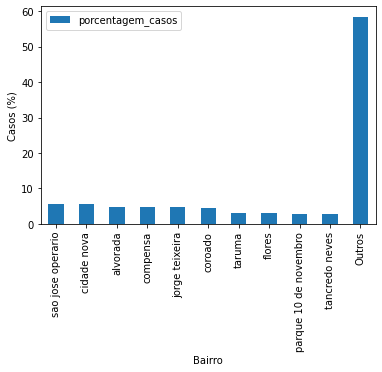

In [58]:
ax = pd_bairros.plot.bar()
ax.set_ylabel('Casos (%)')
ax.set_xlabel('Bairro')

In [59]:
pd_bairros.sum()

porcentagem_casos    100.0
dtype: float64

###### 2. Denote, por sexo, o boxplot da idade dos casos confirmados. Há outliers?

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<Figure size 432x288 with 0 Axes>

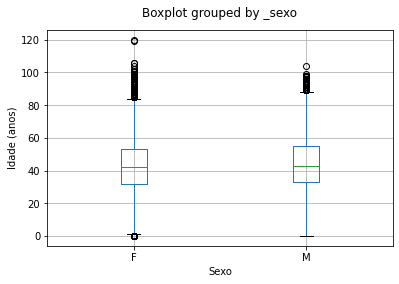

In [60]:
plt.figure();
bp = data.boxplot(column=['_idade'], by=['_sexo']);
bp.set_title('');
bp.set_ylabel('Idade (anos)');
bp.set_xlabel('Sexo');

Vê-se outliers somente acima do extremo (whisker ou fio de bigode) superior no box plot masculino.

No feminino houve a presença de outliers em ambos os extremos (whisker ou fio de bigode), mais dispersos na parte superior.

###### 3. Denote em um gráfico de barras o número de novos casos por dia, considerando os 10 últimos dias existentes na base de dados;

In [61]:
dias = (pd.to_datetime(data['_dt_notificacao'], format='%d/%m/%Y %H:%M').dt.floor('d').value_counts(sort=False))
dias.sort_index(inplace=True)
print(dias.sum())

41675


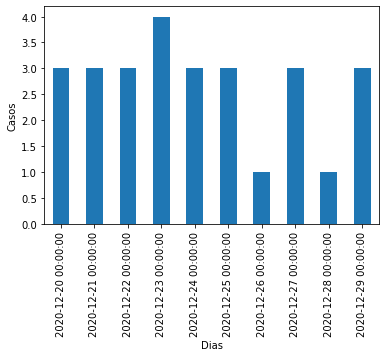

In [62]:
ax = dias.tail(10).plot.bar()
ax.set_ylabel('Casos')
ax.set_xlabel('Dias');

###### 4. Repita o gráfico anterior considerando o número de casos recuperados;

In [63]:
recuperados = data.loc[data['_conclusao'] == "Recuperado"]
dias = (pd.to_datetime(recuperados['_dt_notificacao'], format='%d/%m/%Y %H:%M').dt.floor('d').value_counts(sort=False))
dias.sort_index(inplace=True)
print(dias.sum())

38296


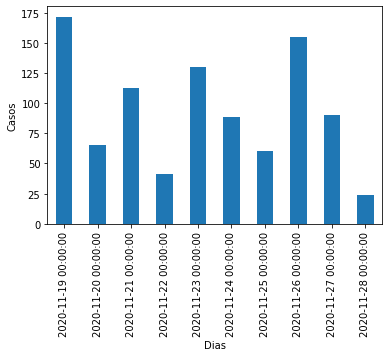

In [64]:
ax = dias.tail(10).plot.bar()
ax.set_ylabel('Casos')
ax.set_xlabel('Dias');

###### 5. Construa um histograma que denote a quantidade percentual de casos por grupo etário, considerando que cada grupo contempla uma década (0 a 10 anos, 11 a 20 anos, etc.);

In [65]:
faixa_idade = data.groupby(data._idade.sub(1).abs().floordiv(10)).size()
faixa_idade = faixa_idade.rename(index={0: '0-10', 1: '11-20', 2: '21-30', \
                                        3: '31-40', 4: '41-50', 5: '51-60', \
                                        6: '61-70', 7: '71-80', 8: '81-90', \
                                        9: '91-100', 10: '101-110', 11: '111-120'})
faixa_idade

_idade
0-10       1288
11-20      1795
21-30      5956
31-40      9852
41-50      9593
51-60      6471
61-70      3728
71-80      1965
81-90       836
91-100      182
101-110       7
111-120       2
dtype: int64

In [66]:
faixa_idade_percent = faixa_idade.div(len(data)).mul(100)
faixa_idade_percent

_idade
0-10        3.090582
11-20       4.307139
21-30      14.291542
31-40      23.640072
41-50      23.018596
51-60      15.527295
61-70       8.945411
71-80       4.715057
81-90       2.005999
91-100      0.436713
101-110     0.016797
111-120     0.004799
dtype: float64

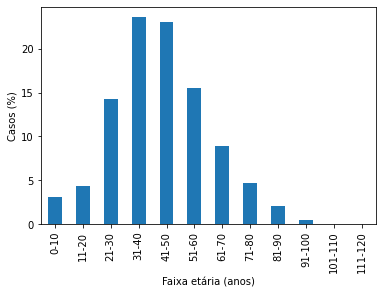

In [67]:
ax = faixa_idade_percent.plot.bar()
ax.set_ylabel('Casos (%)')
ax.set_xlabel('Faixa etária (anos)');

###### 6. Elabore um gráfico que mostra o cumulativo de casos notificados ao longo do tempo;

In [68]:
dias = (pd.to_datetime(data['_dt_notificacao'], format='%d/%m/%Y %H:%M').dt.floor('d').value_counts(sort=False))
dias.sort_index(inplace=True)
dias

2020-02-16    2
2020-02-23    1
2020-02-28    1
2020-03-02    2
2020-03-09    1
             ..
2020-12-25    3
2020-12-26    1
2020-12-27    3
2020-12-28    1
2020-12-29    3
Name: _dt_notificacao, Length: 295, dtype: int64

In [69]:
acc = dias.cumsum()
acc

2020-02-16        2
2020-02-23        3
2020-02-28        4
2020-03-02        6
2020-03-09        7
              ...  
2020-12-25    41667
2020-12-26    41668
2020-12-27    41671
2020-12-28    41672
2020-12-29    41675
Name: _dt_notificacao, Length: 295, dtype: int64

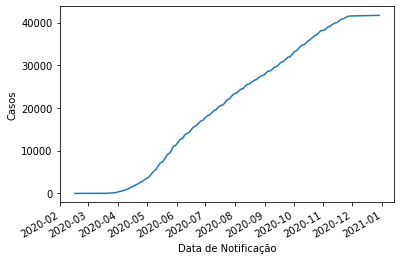

In [70]:
ax = acc.plot.line()
ax.set_ylabel('Casos')
ax.set_xlabel('Data de Notificação');

###### 7. Faça um gráfico do tipo scatterplot que denote a idade versus o número total de casos registrado para aquela idade. Aproveite o processamento efetuado para o cálculo da correlação. É possível observar alguma tendência?

In [71]:
n_casos_por_idade = pd.DataFrame(data.groupby('_idade').size(), columns = ['numero_de_casos']).reset_index(level=0)
n_casos_por_idade

,_idade,numero_de_casos
0,0.0,340
1,1.0,171
2,2.0,110
3,3.0,88
4,4.0,84
...,...,...
102,102.0,2
103,104.0,2
104,106.0,2
105,119.0,1


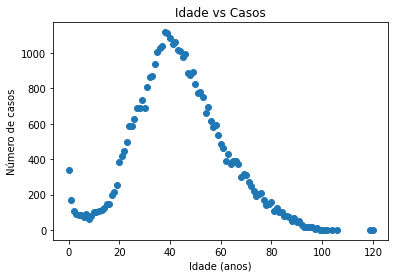

In [72]:
ax = plt.axes()
ax.scatter(n_casos_por_idade._idade, n_casos_por_idade.numero_de_casos)

ax.set(xlabel='Idade (anos)',
       ylabel='Número de casos',
       title='Idade vs Casos');

# 2.3 Tipos de Tarefas

###### 1. Uma tarefa de classificação mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais métricas de desempenho poderiam ser aplicadas? Que tipo de validação seria apropriado?

Inferir conclusao (multiclasse - Recuperado, óbito, ou óbito por outras) a partir da faixa etária, sexo, evolução e testes, usando a métrica acurácia, e validação cruzada.

###### 2. Uma tarefa de regressão mediante Aprendizado Supervisionado que poderia ser feita com esta base de dados. Qual seria o atributo-alvo? Quais atributos preditores a equipe considera relevantes para o cenário?

Prever valor taxa pelas colunas, usando a métrica RMSE e validação cruzada.

In [74]:
import seaborn as sns

sns.set_context('notebook')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

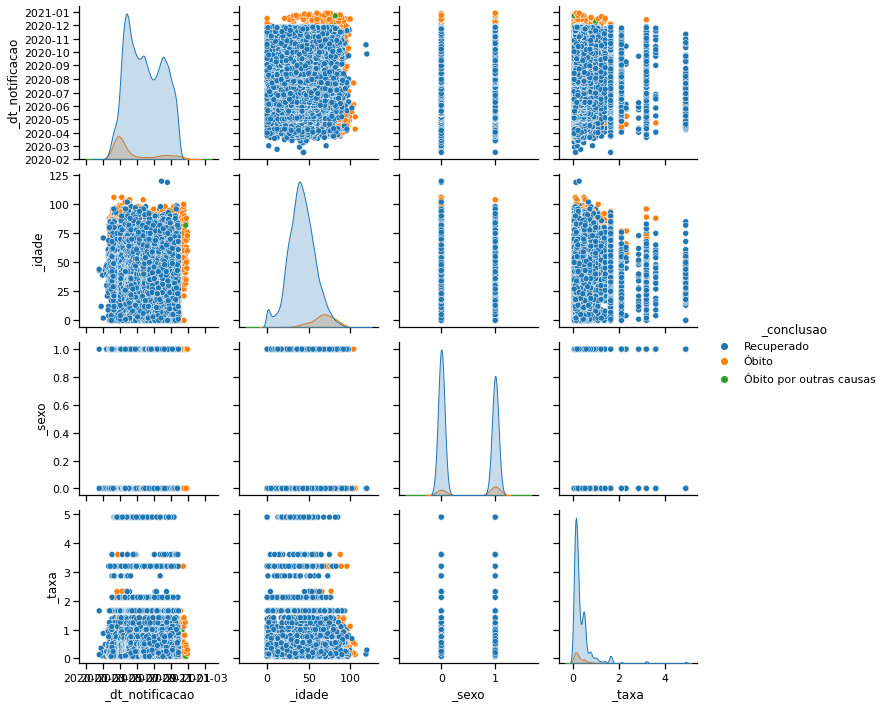

In [75]:
data_pair = data[['_conclusao','_dt_notificacao', '_idade', '_taxa', '_sexo']]
data_pair['_sexo'] = pd.to_numeric(data_pair['_sexo'].str.replace('F', '0').replace('M', '1'), errors='coerce')
data_pair['_taxa'] = pd.to_numeric(data_pair['_taxa'].str.replace(',', '.'), errors='coerce')
data_pair['_dt_notificacao'] = pd.to_datetime(data_pair['_dt_notificacao'], format='%d/%m/%Y %H:%M')
seaborn_axisgrid_PairGrid = sns.pairplot(data_pair, hue='_conclusao',vars=['_dt_notificacao', '_idade', '_sexo', '_taxa'])

In [77]:
#!jupyter nbconvert --to html RNA_AA1.2.ipynb